<h1>Assignment 4: programming</h1>

This is the programming part of Assignment 4. When you're done, select "Restart and run all" in the Kernel menu, and make sure your code behaves as you expect. There is a theoretical part of the assignment also, found in the Handouts folder on CoCalc, which must be handed in at the <i>start</i> of class on Tuesday, October 15.

First, run the following code to import packages that we'll need.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

<h2>1. Finite differences</h2>

<h4>a.</h4>
Complete the following functions, each of which uses a different finite difference formula to approximate $f'(x)$.

In [2]:
def fd_forward(f,x,h):
    # INPUTS: 
    # f is the name of the function to be evaluated
    # x (a float or numpy array) is the point at which to approximate f'(x). x can be a float or a numpy array.
    # h (a float) is the step size in the finite difference formula. h is a float.
    # OUTPUT: float or numpy array approximating f'(x) using the forward difference formula.
    
    return ((f(x+h) - f(x))/h)
    # your code here
    

def fd_center(f,x,h):
    # INPUTS: 
    # f is the name of the function to be evaluated
    # x is the point at which to approximate f'(x)
    # h is the step size in the finite difference formula
    # OUTPUT: float or numpy array approximating f'(x) using the centered difference formula.
    
    return ((f(x+h) - f(x-h))/(2*h))
    # your code here
    

def fd_2b(f,x,h):
    # INPUTS: 
    # f is the name of the function to be evaluated
    # x is the point at which to approximate f'(x)
    # h is the step size in the finite difference formula
    # OUTPUT: float or numpy array approximating f'(x) using the method from theory part 2b
    return (f(x+2*h)+ 3*f(x) - 4*f(x-h))/(6*h);
    # your code here

<h4>b.</h4>
Let $g(x) = e^{-x}\sin(x^2)$. Find the analytical expression for $g'(x)$ and implement it in the <tt>dgdx</tt> function below.

Text(0.5, 0, 'x')

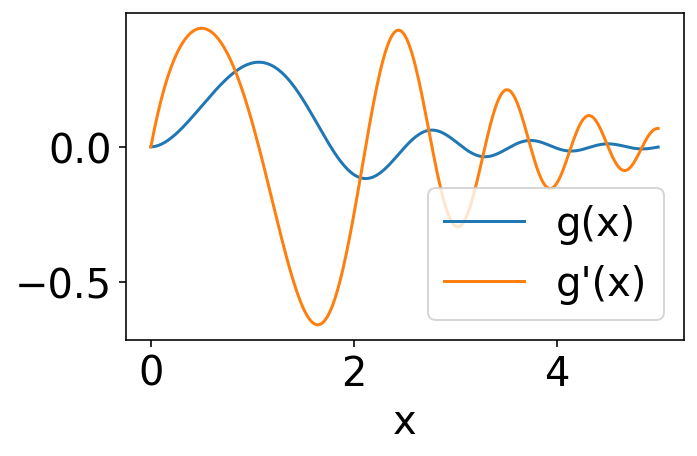

In [3]:
def g(x): return np.exp(-x) * np.sin(x**2)
def dgdx(x): return np.exp(-x) * ((2*x*np.cos(x**2)) - np.sin(x**2))# your code here

# plot the functions
x = np.linspace(0,5,300)
plt.figure(figsize=(5,3))
plt.plot(x,g(x),label='g(x)')
plt.plot(x,dgdx(x),label='g\'(x)')
plt.legend()
plt.xlabel('x')

The following code prints the value of $g'(2)$ from your analytical expression, along with the approximations from your finite difference functions. You can use this to check the correctness of your functions. Try different $h$ values.

In [4]:
h = 0.1
print('Analytical value:',dgdx(2))
print('Forward difference:',fd_forward(g,2,h))
print('Centered difference:',fd_center(g,2,h))
print('Part 2b:',fd_2b(g,2,h))

Analytical value: -0.25142209820485434
Forward difference: -0.14478227171939556
Centered difference: -0.24687599025760418
Part 2b: -0.2451133240877061


<h4>c.</h4>

With all 3 finite difference formulas you have implemented, approximate $g'(2)$ using $h=10^{-1},10^{-2},\ldots,10^{-5}$. Compute the magnitude of the error for each approximation, using your <tt>dgdx</tt> function to get the "exact" value. On a single plot with log-log axes, plot a <tt>scatter</tt> of error magnitude versus $1/h$ for each of the three finite difference formulas. Include a legend in your plot to indicate the three finite formulas. Make sure the convergence order is what you expect in each case.

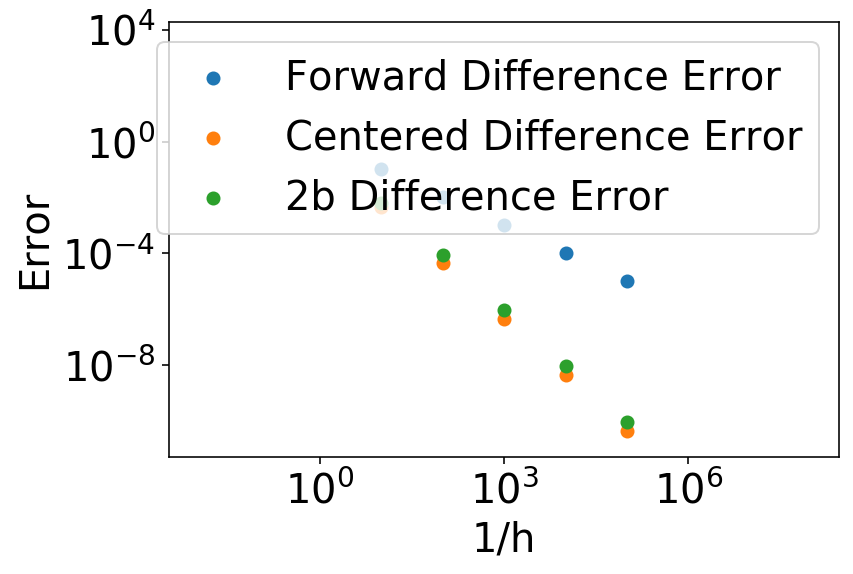

In [5]:
h = np.array([0.1,0.01,0.001,0.0001,0.00001])
error_fd_forward = np.abs(dgdx(2)-fd_forward(g,2,h))
error_fd_center = np.abs(dgdx(2)-fd_center(g,2,h))
error_fd_2b = np.abs(dgdx(2)-fd_2b(g,2,h))

    
plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.scatter(1/h,error_fd_forward,label='Forward Difference Error')
plt.scatter(1/h,error_fd_center,label='Centered Difference Error')
plt.scatter(1/h,error_fd_2b,label='2b Difference Error')
plt.xlabel('1/h')
plt.ylabel('Error')
plt.legend()
plt.show()    

<h4>d.</h4>
Below is a function that implements a higher-order finite difference approximation.

In [6]:
def fd_higher(f,x,h): return (-f(x+2*h) + 8*f(x+h) - 8*f(x-h) + f(x-2*h)) / 12 / h

On log-log axes, plot error magnitude versus $1/h$ for approximations of $g'(2)$ computed using the finite difference formula in <tt>fd_higher</tt>. Use $h=10^{-1},~10^{-1.5},~10^{-2},~10^{-2.5},~10^{-3}$.

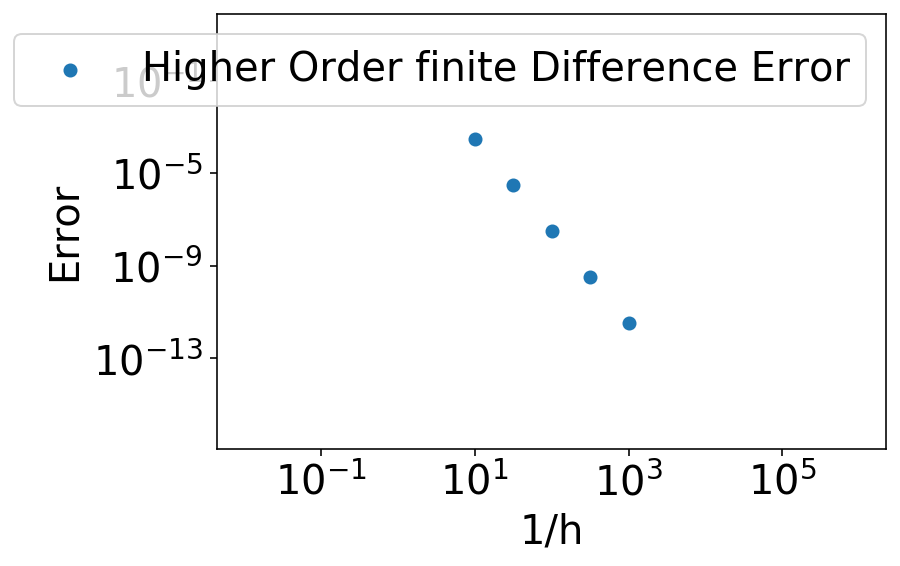

In [7]:
h = np.array([1e-1,10**-1.5,1e-2,10**-2.5,1e-3])
x = np.zeros(np.size(h))
error_fd_higher = np.abs(dgdx(2)-fd_higher(g,2,h))
    
plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.scatter(1/h,error_fd_higher,label='Higher Order finite Difference Error')
plt.xlabel('1/h')
plt.ylabel('Error')
plt.legend()
plt.show()    

Based on your plot, what do you think is the order (in $h$) of the finite difference method implemented in the <tt>fd</tt> function? Assign the following variable to record your answer.

In [8]:
p = np.max(np.round(np.log(error_fd_higher)/np.log(h)))
print(p)

4.0


<h4>e.</h4>

Repeat part c, this time also including the finite difference formula from part d, and including smaller $h$ values: $h=10^{-1},10^{-2},\ldots,10^{-12}$. As before, plot a <tt>scatter</tt> of error magnitude versus $1/h$ for each of the four finite difference formulas.

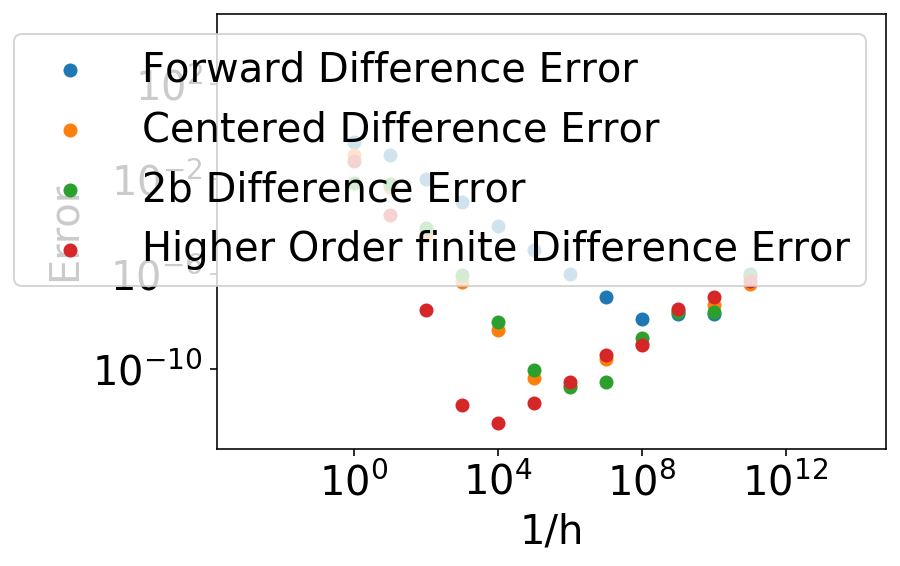

In [9]:
h = np.zeros(12)
for i in range (np.size(h)):
    h[i] = 10**(-1*i)
error_fd_forward = np.abs(dgdx(2)-fd_forward(g,2,h))
error_fd_center = np.abs(dgdx(2)-fd_center(g,2,h))
error_fd_2b = np.abs(dgdx(2)-fd_2b(g,2,h))
error_fd_higher = np.abs(dgdx(2)-fd_higher(g,2,h))

    
plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.scatter(1/h,error_fd_forward,label='Forward Difference Error')
plt.scatter(1/h,error_fd_center,label='Centered Difference Error')
plt.scatter(1/h,error_fd_2b,label='2b Difference Error')
plt.scatter(1/h,error_fd_higher,label='Higher Order finite Difference Error')

plt.xlabel('1/h')
plt.ylabel('Error')
plt.legend()
plt.show()   

After a certain point, the error of each method starts to increase approximately like $O((1/h)^q)$. What is the approximate integer value of $q$? It should suffice to read the value of $q$ off the plot. Assign the following variable to record your answer.

In [10]:
q = 1
print(q)

1
